In [9]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")

In [10]:
# load datasest
df = pd.read_excel("./data/2nd_Dataset_IgM_Rapid_Test-ELISA_Raw_Data.xlsx", header=0, comment="#")
len(df)

106

In [11]:
# further cleanup
indexNames = df[df['Age'] == 'NS'].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

# set age to numeric
df["Age"] = df["Age"].astype(int)

# bin ages
df["Age bin"] = pd.cut(x=df['Age'], 
                       bins=[10, 20, 29, 39, 49, 59, 69, 79, 89], 
                       labels=['10s', '20s', '30s', '40s', '50s','60s', '70s', '80s'])

# remove unwanted spaces

df[" IgM/Pos."] = df[" IgM/Pos."].str.replace(' ', '')

# remove empty cells
df = df.dropna(axis=0)
len(df)

87

In [12]:
# create class column
def get_class(row):
    wanted = row["lab-ID"]
    return wanted.split("-")[0]

df["status"] = df.apply(get_class, axis=1)

# create target column
def encode_symptoms(row):
    wanted = row["Symptoms"]
    if str(wanted) == "no":
        return 0
    return 1

df["target"] = df.apply(encode_symptoms, axis=1)


# create target column
def encode_symptoms(row):
    wanted = row["Symptoms"]
    if str(wanted) == "no":
        return "no"
    return "yes"

df["symptoms_presence"] = df.apply(encode_symptoms, axis=1)

In [13]:
# Classify status

high_od_elisa = df[df["E-IgM/ODs"] >= 0.5]
high_int_rapid_test = df[df["IgM/b-intin. value"] >= 10]
low_od_elisa  = df[df["E-IgM/ODs"] < 0.5]
low_int_rapid_test = df[df["IgM/b-intin. value"] < 10]

print("status | number_of_participants")
print("--------------------------")
print(f"high_elisa_od | {len(high_od_elisa)}")
print("--------------------------")
print(f"low_elisa_od | {len(low_od_elisa)}")
print("--------------------------")
print(f"high_rapid_test_int | {len(high_int_rapid_test)}")
print("--------------------------")
print(f"low_rapid_test_int | {len(low_int_rapid_test)}")




status | number_of_participants
--------------------------
high_elisa_od | 14
--------------------------
low_elisa_od | 73
--------------------------
high_rapid_test_int | 12
--------------------------
low_rapid_test_int | 75


In [14]:
def plot_symptoms_status(df_slice):
    count_dict = dict(df_slice["symptoms_presence"].value_counts())
    ax = sns.countplot(x="symptoms_presence", data=df_slice)
    for index, text in enumerate(ax.get_xticklabels()):
        label = count_dict[text.get_text()]
        ax.text(index,
                label + 0.1,
                str(label),
                horizontalalignment='center',
                size='medium',
                color='black',
                weight='normal')
    return plt.show()
    

High ELISA od


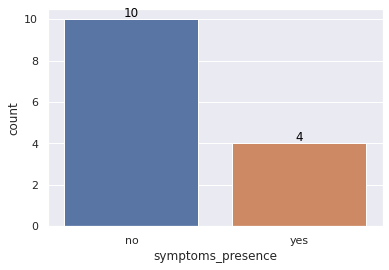

In [19]:
# symptoms status in high elisa od particpants
print("High ELISA od")
plot_symptoms_status(high_od_elisa)


Low ELISA od


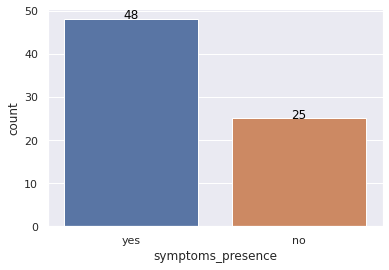

In [20]:
# symptoms status in low elisa od particpants
print("Low ELISA od")
plot_symptoms_status(low_od_elisa)

High Rapid test intensity


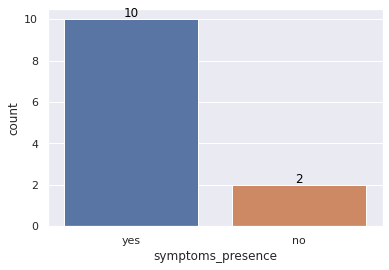

In [24]:
# symptoms status in high rapid test particpants
print("High Rapid test intensity")
plot_symptoms_status(high_int_rapid_test)

Low Rapid test intensity


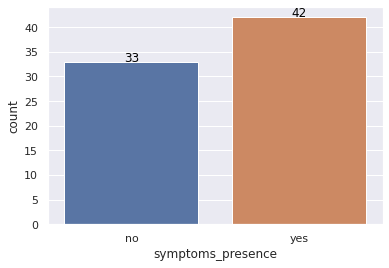

In [23]:
# symptoms status in low rapid test particpants
print("Low Rapid test intensity")
plot_symptoms_status(low_int_rapid_test)

In [ ]:
# Test
# Chi squared
# Proportion of symptomatic patients is the same irrespective of the level of titre
# t test
# mean of elisa od in symtomatic patienst with high 
# titre is equal to mean of elisa od in symptomatic patients with low tire

In [101]:
low_od_elisa[low_od_elisa["Symptoms"] == "no"]

,lab-ID,Gender,Age,IgM/Pos.,IgM/b-intin.,IgM/b-intin. value,E-IgM/ODs,E-IgM/Pos.,E-IgM/Ods,E-IgM/Pos..1,IgM,IgM.1,Symptoms,Age bin,status,target,symptoms_presence
1,LSS-2,F,45,N,no,0,0.425,N,0.425,N,6.0,8.5,no,40s,LSS,0,no
3,LSS-4,M,40,N,no,0,0.498,N,0.498,P,7.0,10.0,no,40s,LSS,0,no
4,LSS-5,M,50,N,no,0,0.363,N,0.363,N,5.1,7.3,no,50s,LSS,0,no
6,LSS-7,M,42,N,no,0,0.436,N,0.436,N,6.1,8.7,no,40s,LSS,0,no
7,LSS-8,F,48,N,no,0,0.299,N,0.299,N,4.1,5.9,no,40s,LSS,0,no
10,LSS-11,F,42,N,no,0,0.370,N,0.370,N,5.2,7.5,no,40s,LSS,0,no
16,LSS-17,F,23,N,no,0,0.395,N,0.395,N,5.5,7.9,no,20s,LSS,0,no
21,LSS-22,M,19,N,no,0,0.422,N,0.422,N,6.0,8.5,no,10s,LSS,0,no
23,LSS-24,M,58,P,F,10,0.414,N,0.414,N,5.8,8.3,no,50s,LSS,0,no
25,LSS-26,M,20,N,no,0,0.289,N,0.289,N,4.0,5.7,no,10s,LSS,0,no


In [103]:
len(low_od_elisa[low_od_elisa["Symptoms"] != "no"])

48

In [25]:
high_int_rapid_test

,lab-ID,Gender,Age,IgM/Pos.,IgM/b-intin.,IgM/b-intin. value,E-IgM/ODs,E-IgM/Pos.,E-IgM/Ods,E-IgM/Pos..1,IgM,IgM.1,Symptoms,Age bin,status,target,symptoms_presence
0,LSS-1,M,54,P,F,10,0.383,N,0.383,N,5.4,7.7,"Headache, sorethroat",50s,LSS,1,yes
11,LSS-12,F,36,P,F,10,0.445,N,0.445,N,6.2,8.9,"Fever, dyspnea, headache, sorethroat, Cough, a...",30s,LSS,1,yes
17,LSS-18,F,41,P,F,10,0.366,N,0.366,N,5.1,7.3,Sorethroat,40s,LSS,1,yes
18,LSS-19,F,40,P,F,10,0.757,P,0.757,P,10.7,15.3,no,40s,LSS,0,no
20,LSS-21,F,23,P,F,10,0.398,N,0.398,N,5.5,7.9,"Faver, abdominal pain, myalgia, headache",20s,LSS,1,yes
23,LSS-24,M,58,P,F,10,0.414,N,0.414,N,5.8,8.3,no,50s,LSS,0,no
29,LSS-30,F,55,P,F,10,1.130,P,1.130,P,16.1,23.0,"Cough, myalgia, fatigue",50s,LSS,1,yes
30,LSS-31,F,44,P,S,100,0.552,N,0.552,P,7.8,11.2,"Dizziness, blurred vision, headache, fatigue",40s,LSS,1,yes
56,HSS-57,M,54,P,F,10,0.497,N,0.497,P,7.0,10.0,"Fatigue, sorthroat, myalgia",50s,HSS,1,yes
69,HSS-70,M,30,P,F,10,0.347,N,0.347,N,4.8,5.7,Headache,30s,HSS,1,yes
